## Observations and Insights 

# The linear regression model visually suggests there is a correlation between average mouse weight and tumor volume, however the coefficient (r^2) value suggests there is not a strong enough correlation between the two variables.
# If you have a mouse with cancer and choose to treat the mouse with anti-cancer treatment, then the trials with Capomulin and Ramicane suggest the greatest outcome and thus choice of treatment for tumor volume shrinkage with time.
# Ceftamin has the greatest range in final tumor volume out of the 4 most promising treatments.

In [872]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [873]:
# Checking the number of mice.
unique_mouse = merged['Mouse ID'].unique()
number_unique = len(unique_mouse)

# Printing results
number_unique


249

In [874]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged[merged.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_rows_num = duplicate_rows['Mouse ID'].value_counts()

duplicate_rows_num




g989    5
Name: Mouse ID, dtype: int64

In [875]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = merged.set_index('Mouse ID')
duplicate_mouse.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [876]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = merged.drop(merged[merged['Mouse ID']=='g989'].index, inplace=False)

#Checking to make sure the duplicate rows were dropped.  Yes, 1,893 - 1,880 = 13 dropped duplicate rows
len(cleandf)

1880

In [877]:
# Checking the number of mice in the clean DataFrame.
duplicate_drop_unique = cleandf['Mouse ID'].unique()
total_clean = len(duplicate_drop_unique)
total_clean


248

## Summary Statistics

In [878]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_tumor = cleandf[['Drug Regimen', 'Tumor Volume (mm3)']]
regimen_tumor_grouped = regimen_tumor.groupby(['Drug Regimen'])
regimen_mean = regimen_tumor_grouped['Tumor Volume (mm3)'].mean()
regimen_med = regimen_tumor_grouped['Tumor Volume (mm3)'].median()
regimen_var = regimen_tumor_grouped['Tumor Volume (mm3)'].var()
regimen_std = regimen_tumor_grouped['Tumor Volume (mm3)'].std()
regimen_sem = regimen_tumor_grouped['Tumor Volume (mm3)'].sem()
regimen_stat_table = pd.merge(regimen_mean, regimen_med, how='outer', on=['Drug Regimen'])
regimen_stat_table = regimen_stat_table.rename(columns={'Tumor Volume (mm3)_x': 'Mean Tumor Volume (mm3)', 
                                                        'Tumor Volume (mm3)_y': 'Median Tumor Volume (mm3)'})
regimen_stat_table = pd.merge(regimen_stat_table, regimen_var, how='outer', on=['Drug Regimen'])
regimen_stat_table = regimen_stat_table.rename(columns={'Tumor Volume (mm3)': 'Variance Tumor Volume (mm3)'})
regimen_stat_table = pd.merge(regimen_stat_table, regimen_std, how='outer', on=['Drug Regimen'])
regimen_stat_table = regimen_stat_table.rename(columns={'Tumor Volume (mm3)': 'Std Dev Tumor Volume (mm3)'})
regimen_stat_table = pd.merge(regimen_stat_table, regimen_sem, how='outer', on=['Drug Regimen'])
regimen_stat_table = regimen_stat_table.rename(columns={'Tumor Volume (mm3)': 'SEM Dev Tumor Volume (mm3)'})
regimen_stat_table

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std Dev Tumor Volume (mm3),SEM Dev Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [879]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_tumor_agg = regimen_tumor_grouped.agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

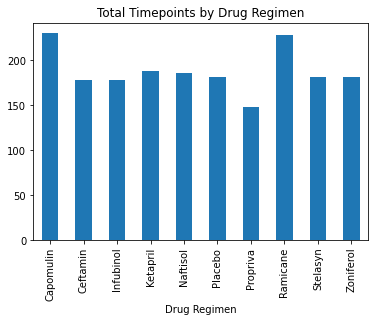

In [880]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_df = cleandf[['Drug Regimen', 'Timepoint']]
bar_df_grouped = bar_df.groupby(['Drug Regimen'])
bar_df_sum = bar_df_grouped['Timepoint'].count()
regimen_bar = bar_df_sum.plot.bar(x='Drug Regimen', y='Timepoint', title='Total Timepoints by Drug Regimen')
bar_df_sum



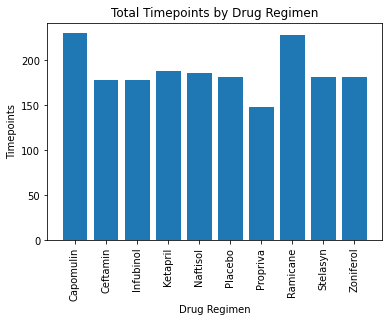

In [881]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bar_df_sum.index, bar_df_sum)
plt.xticks(rotation="vertical")
plt.title('Total Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.show()



<AxesSubplot:ylabel='Mouse ID'>

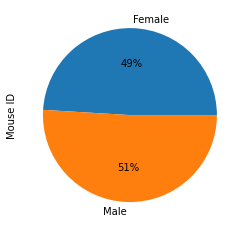

In [882]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# male = cleandf.loc[(merged['Sex'] == "Male")]
# male_tot = male['Mouse ID'].count()
# female = cleandf.loc[(merged['Sex'] == "Female")]
# female_tot = female['Mouse ID'].count()


sex = cleandf.groupby(['Sex'])
sex_df = sex['Mouse ID'].count()

sex_df.plot(kind='pie', autopct='%1.0f%%')





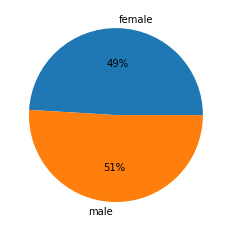

In [883]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df, autopct='%1.0f%%', labels=['female', 'male'])

plt.show()

## Quartiles, Outliers and Boxplots

In [884]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = cleandf.groupby(['Mouse ID'])
last_tp = last_tp['Timepoint'].max()



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged2 = pd.merge(cleandf, last_tp, on=('Mouse ID', 'Timepoint'))

merged2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [885]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tvd = []
drug1 = []
drug2 = []
drug3 = []
drug4 = []

# Loop to append Tumor Volume Data (tvd) with drug regimen data from the treatments list
for drug in treatments:
    tvd.append(merged2.loc[merged2['Drug Regimen'] == drug, :])

# Separate lists to hold data for each drug regimen separately to be used in next step
drug1 = tvd[0]['Tumor Volume (mm3)']
drug2 = tvd[1]['Tumor Volume (mm3)']
drug3 = tvd[2]['Tumor Volume (mm3)']
drug4 = tvd[3]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each drug in treatments list and perform calculations and print the results
for drug in treatments:
    quartiles = merged2.loc[merged2['Drug Regimen'] == drug, :]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile rang

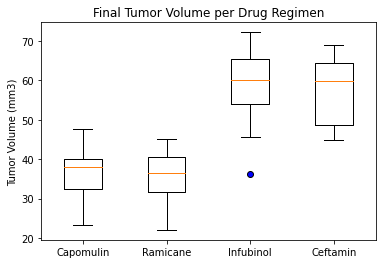

In [886]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
# Plots all 4 boxes plus highlights the outlier in specified color
ax1.boxplot([drug1, drug2, drug3, drug4], flierprops={'markerfacecolor':'b'})
# Renames x axis for drugs within treatments list
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

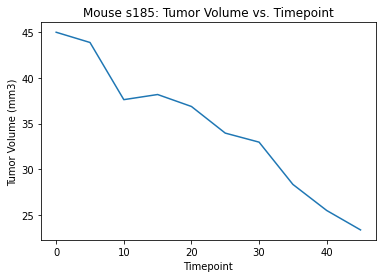

In [887]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Choosing s185 from merged2 df:

mouse_id = cleandf.set_index('Mouse ID')
s185 = mouse_id.loc['s185']

x_values = s185['Timepoint']
y_values = s185['Tumor Volume (mm3)']

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse s185: Tumor Volume vs. Timepoint")

plt.plot(x_values, y_values)


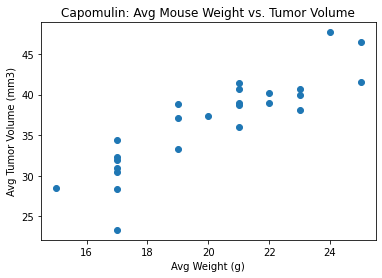

In [888]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

regimen = merged2.loc[merged2['Drug Regimen'] == 'Capomulin']

regimen_avg = regimen.groupby('Mouse ID').mean()

x_values = regimen_avg['Weight (g)']
y_values = regimen_avg['Tumor Volume (mm3)']

plt.title("Capomulin: Avg Mouse Weight vs. Tumor Volume")
plt.xlabel('Avg Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.scatter(x_values, y_values)
plt.show()


## Correlation and Regression

The r-squared is: 0.7686134812139006
The linear regression model is: y = 1.75x + 1.45


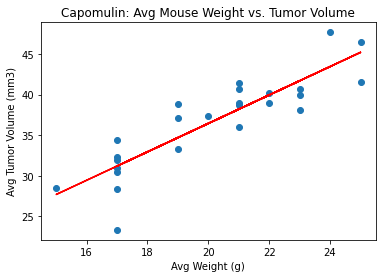

In [889]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Capomulin: Avg Mouse Weight vs. Tumor Volume")
plt.xlabel('Avg Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
print(f'The linear regression model is: {line_eq}')
plt.show()